In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load training and testing data
train_data = pd.read_csv("trainData.csv")
test_data = pd.read_csv("testData.csv")

 PreProcessing Data

In [3]:
# Preprocessing
train_data['y'] = train_data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

#Dropping the Id member_id columns as they dont have any information usefull to the model
train_data.drop(columns=['id', 'member_id','loan_status'], inplace=True)
test_data.drop(columns=['id', 'member_id'], inplace=True)

In [4]:
# Encode categorical variables
cat_cols = ['grade', 'emp_length', 'home_ownership', 'application_type']
for col in cat_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])
    
    





In [5]:
# Display columns with their corresponding number of null values
null_counts = train_data.isnull().sum()
print("Columns and their number of null values:")
print(null_counts)

Columns and their number of null values:
loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
emp_length                         0
home_ownership                     0
annual_inc                         0
dti                              180
delinq_2yrs                        5
inq_last_6mths                     5
mths_since_last_delinq        115840
open_acc                           5
pub_rec                            5
revol_bal                          0
revol_util                       190
total_acc                          5
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
collections_12_mths_ex_med        16
application_type                  

In [6]:
#mths_since_last_delinq variable is important feature to check for default but has 50% null values.
#Replacing the NULL values with 0 assuming that while data collection the values were missed because of no delinquencies occuring


train_data['mths_since_last_delinq'].fillna(train_data['mths_since_last_delinq'].mean(), inplace=True)
test_data['mths_since_last_delinq'].fillna(test_data['mths_since_last_delinq'].mean(), inplace=True)

In [7]:
#Replacing the rows where column has null values

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Check the shape of the DataFrame after removing rows with null values
print("Shape of DataFrame after removing rows with null values:", train_data.shape)
print("Shape of DataFrame after removing rows with null values:", test_data.shape)

Shape of DataFrame after removing rows with null values: (218604, 31)
Shape of DataFrame after removing rows with null values: (218720, 31)


In [8]:
numeric_columns = train_data.select_dtypes(include='number').columns

# Check if each column is numeric
for column in train_data.columns:
    is_numeric = column in numeric_columns
    print(f"Column '{column}' is numeric: {is_numeric}")

Column 'loan_amnt' is numeric: True
Column 'int_rate' is numeric: True
Column 'installment' is numeric: True
Column 'grade' is numeric: True
Column 'emp_length' is numeric: True
Column 'home_ownership' is numeric: True
Column 'annual_inc' is numeric: True
Column 'dti' is numeric: True
Column 'delinq_2yrs' is numeric: True
Column 'inq_last_6mths' is numeric: True
Column 'mths_since_last_delinq' is numeric: True
Column 'open_acc' is numeric: True
Column 'pub_rec' is numeric: True
Column 'revol_bal' is numeric: True
Column 'revol_util' is numeric: True
Column 'total_acc' is numeric: True
Column 'total_pymnt' is numeric: True
Column 'total_pymnt_inv' is numeric: True
Column 'total_rec_prncp' is numeric: True
Column 'total_rec_int' is numeric: True
Column 'total_rec_late_fee' is numeric: True
Column 'recoveries' is numeric: True
Column 'collection_recovery_fee' is numeric: True
Column 'last_pymnt_amnt' is numeric: True
Column 'collections_12_mths_ex_med' is numeric: True
Column 'application

In [9]:
Correlation = train_data.corrwith(train_data['y'])
abs_correlation = Correlation.abs().sort_values(ascending=False)
print("Correlation of variables with 'loan_status':")
print(abs_correlation)

Correlation of variables with 'loan_status':
y                             1.000000
recoveries                    0.523448
collection_recovery_fee       0.504759
grade                         0.224438
total_rec_prncp               0.213357
int_rate                      0.199086
last_pymnt_amnt               0.173894
total_pymnt_inv               0.129822
total_pymnt                   0.129816
total_rec_late_fee            0.100838
inq_last_6mths                0.090857
revol_util                    0.066026
total_rev_hi_lim              0.057935
application_type              0.051395
tot_cur_bal                   0.051248
home_ownership                0.047306
total_rec_int                 0.038889
dti                           0.035348
annual_inc                    0.033073
pub_rec                       0.031546
installment                   0.027409
loan_amnt                     0.020313
open_acc                      0.020041
revol_bal                     0.019001
delinq_2yrs        

In [10]:
# Handle missing values if any
# For simplicity droping rows with missing values
train_data.dropna(inplace=True)



# Split data into features and target variable
#Training set
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']


#Test set
X_test = test_data.drop(columns=['loan_status'])
y_test = test_data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)



In [11]:
#Dropping 3 low correlation variables
#tot_coll_amt
#collections_12_mths_ex_med
#mths_since_last_delinq
X_train = X_train.drop(columns=['tot_coll_amt','collections_12_mths_ex_med','mths_since_last_delinq'])
X_test = X_test.drop(columns=['tot_coll_amt','collections_12_mths_ex_med','mths_since_last_delinq'])



In [12]:
X_test.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,application_type,acc_now_delinq,tot_cur_bal,total_rev_hi_lim
0,8000,7.07,247.28,0,1,1,78000.0,19.25,0.0,0.0,...,8000.00,325.02,0.0,0.0,0.0,6844.48,0,0.0,200412.0,16800.0
1,20000,7.21,619.47,0,3,5,78000.0,23.06,0.0,0.0,...,3041.18,659.62,0.0,0.0,0.0,619.47,0,0.0,39187.0,42100.0
2,20000,12.74,452.41,2,5,1,97000.0,5.52,1.0,0.0,...,6215.08,4217.64,0.0,0.0,0.0,452.41,0,0.0,279688.0,6500.0
3,20000,8.81,634.23,0,1,1,115000.0,16.84,0.0,2.0,...,20000.00,6.12,0.0,0.0,0.0,20015.91,0,0.0,172493.0,40200.0
5,9000,19.20,330.82,3,6,5,60000.0,7.28,0.0,0.0,...,9000.00,422.98,0.0,0.0,0.0,8761.49,0,0.0,28658.0,20000.0


In [13]:
X_train.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,application_type,acc_now_delinq,tot_cur_bal,total_rev_hi_lim
0,18600,10.99,608.86,1,6,5,80000.0,12.92,0.0,0.0,...,18600.0,1355.75,0.0,0.0,0.0,15705.09,0,0.0,170238.0,20700.0
1,2000,17.97,72.28,3,4,1,55400.0,10.62,1.0,2.0,...,128.9,83.95,0.0,0.0,0.0,72.28,1,0.0,351452.0,10800.0
2,12000,12.29,400.24,2,1,4,60000.0,17.92,0.0,0.0,...,12000.0,485.96,0.0,0.0,0.0,11281.15,0,0.0,18207.0,20600.0
3,16000,19.42,589.90,3,7,5,64000.0,3.90,1.0,0.0,...,3561.4,2303.08,0.0,0.0,0.0,589.90,0,0.0,12293.0,7800.0
4,22525,16.02,548.01,2,1,1,94080.0,19.08,1.0,0.0,...,22525.0,2226.12,0.0,0.0,0.0,21483.11,0,0.0,571244.0,53800.0


In [14]:


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (using the same scaler)
X_test_scaled = scaler.transform(X_test)

Fitting Linear Regression Model.

In [15]:
# Fit linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions on training data
y_pred_train = model.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error for training data:", mse_train)


# Predictions on test data

y_pred_test = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error for testing data:", mse_test)


Mean Squared Error for training data: 0.06683831179359304
Mean Squared Error for testing data: 0.0676844931715756


Lasso Regression

In [16]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso


# Define the pipeline including any preprocessing steps
# Replace 'preprocessing_step' with your actual preprocessing steps
lasso_pipeline = Pipeline([
    ('lasso', Lasso())  # Lasso regression model
])


In [17]:

# Define the alpha values to search over
alphas = np.arange(0.01, 100, 0.01)

# Define the hyperparameter distributions to search over
param_distributions = {
    'lasso__alpha': alphas  # Lasso alpha (regularization parameter) values
}



In [18]:
# Create RandomizedSearchCV object
random_search_lasso = RandomizedSearchCV(
    lasso_pipeline,
    param_distributions=param_distributions,
    n_iter=len(alphas),  # Number of iterations is equal to the number of alpha values
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1,  # Use all available cores
    random_state=69
)



In [19]:
# Fit the RandomizedSearchCV object to the training data
random_search_lasso.fit(X_train_scaled, y_train)




RandomizedSearchCV(cv=5, estimator=Pipeline(steps=[('lasso', Lasso())]),
                   n_iter=9999, n_jobs=-1,
                   param_distributions={'lasso__alpha': array([1.000e-02, 2.000e-02, 3.000e-02, ..., 9.997e+01, 9.998e+01,
       9.999e+01])},
                   random_state=69, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [20]:
best_alpha = random_search_lasso.best_params_['lasso__alpha']
print("Best alpha is :", best_alpha)

Best alpha is : 0.01


In [21]:
# Make predictions on the test data
predictions_test = random_search_lasso.predict(X_test_scaled)
predictions_train = random_search_lasso.predict(X_train_scaled)

# Evaluate the model
# Example: Calculate mean squared error
mse_test = mean_squared_error(y_test, predictions_test)
mse_train= mean_squared_error(y_train,predictions_train)
print("Mean Squared Error Train (Lasso):", mse_train)
print("Mean Squared Error Test (Lasso):", mse_test)

Mean Squared Error Train (Lasso): 0.06847457554349384
Mean Squared Error Test (Lasso): 0.06939927625564418


Ridge Regression

In [22]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Define the pipeline including any preprocessing steps
# Replace 'preprocessing_step' with your actual preprocessing steps
ridge_pipeline = Pipeline([
    ('ridge', Ridge())  # Ridge regression model
])


In [23]:

# Define the alpha values to search over
alphas = np.arange(0.01, 100, 0.01)

# Define the hyperparameter distributions to search over
param_distributions = {
    'ridge__alpha': alphas  # Ridge alpha (regularization parameter) values
}


In [24]:

random_search_ridge = RandomizedSearchCV(
    ridge_pipeline,
    param_distributions=param_distributions,
    n_iter=len(alphas),  # Number of iterations is equal to the number of alpha values
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1,  # Use all available cores
    random_state=69
)


In [25]:

# Fit the RandomizedSearchCV object to the training data
random_search_ridge.fit(X_train_scaled, y_train)

# Extract the best alpha
best_alpha_ridge = random_search_ridge.best_params_['ridge__alpha']


In [27]:
print(best_alpha_ridge)

99.99000000000001


In [28]:
# Make predictions on the test data
predictions_test = random_search_ridge.predict(X_test_scaled)
predictions_train = random_search_ridge.predict(X_train_scaled)

# Evaluate the model
# Calculate mean squared error
mse_test = mean_squared_error(y_test, predictions_test)
mse_train= mean_squared_error(y_train,predictions_train)
print("Mean Squared Error Train (Ridge):", mse_train)
print("Mean Squared Error Test (Ridge):", mse_test)

Mean Squared Error Train (Ridge): 0.0668391362678708
Mean Squared Error Test (Ridge): 0.06768778229021302


RANDOM FOREST CLASSIFIER

In [31]:

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 150,200,250],
    'max_depth': [3,5,10]
}


In [32]:

# Instantiate the RandomForestClassifier
clf = RandomForestClassifier(
    random_state=69,
    class_weight='balanced'
)


In [33]:

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

In [34]:

# Perform the grid search on the tuning subset
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_


In [35]:
print (best_params['n_estimators'])
print (best_params['max_depth'])

50
3


In [36]:

# Instantiate the RandomForestClassifier with the best parameters
best_clf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    random_state=69,
    class_weight='balanced'
)

In [37]:

# Fit the classifier with the best parameters to the remaining training data
best_clf.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=50,
                       random_state=69)

In [41]:
from sklearn.metrics import accuracy_score
# Make predictions on the training and test data
y_train_pred = best_clf.predict(X_train_scaled)
y_test_pred = best_clf.predict(X_test_scaled)

# Calculate accuracy and precision for training data
train_accuracy = accuracy_score(y_train, y_train_pred)


# Calculate accuracy and precision for test data
test_accuracy = accuracy_score(y_test, y_test_pred)


# Print the results
print("Best Parameters:", best_params)
print("Training accuracy:", train_accuracy)

print("Test accuracy:", test_accuracy)



Best Parameters: {'max_depth': 3, 'n_estimators': 50}
Training accuracy: 0.9623016962178185
Test accuracy: 0.9607991953182151


In [42]:
#Calculate MSE for training and test data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

Training MSE: 0.03769830378218148
Test MSE: 0.03920080468178493


Feature ranking:
1. feature 20 (0.363718) - recoveries
2. feature 21 (0.306790) - collection_recovery_fee
3. feature 22 (0.127809) - last_pymnt_amnt
4. feature 17 (0.070668) - total_rec_prncp
5. feature 3 (0.050194) - grade
6. feature 1 (0.027419) - int_rate
7. feature 19 (0.018079) - total_rec_late_fee
8. feature 16 (0.016292) - total_pymnt_inv
9. feature 15 (0.007410) - total_pymnt
10. feature 2 (0.002291) - installment
11. feature 26 (0.001998) - total_rev_hi_lim
12. feature 9 (0.001647) - inq_last_6mths
13. feature 18 (0.001594) - total_rec_int
14. feature 7 (0.001567) - dti
15. feature 0 (0.001197) - loan_amnt
16. feature 23 (0.000431) - application_type
17. feature 13 (0.000334) - revol_util
18. feature 14 (0.000282) - total_acc
19. feature 6 (0.000138) - annual_inc
20. feature 5 (0.000138) - home_ownership
21. feature 12 (0.000004) - revol_bal
22. feature 11 (0.000000) - pub_rec
23. feature 10 (0.000000) - open_acc
24. feature 8 (0.000000) - delinq_2yrs
25. feature 25 (0.000000)

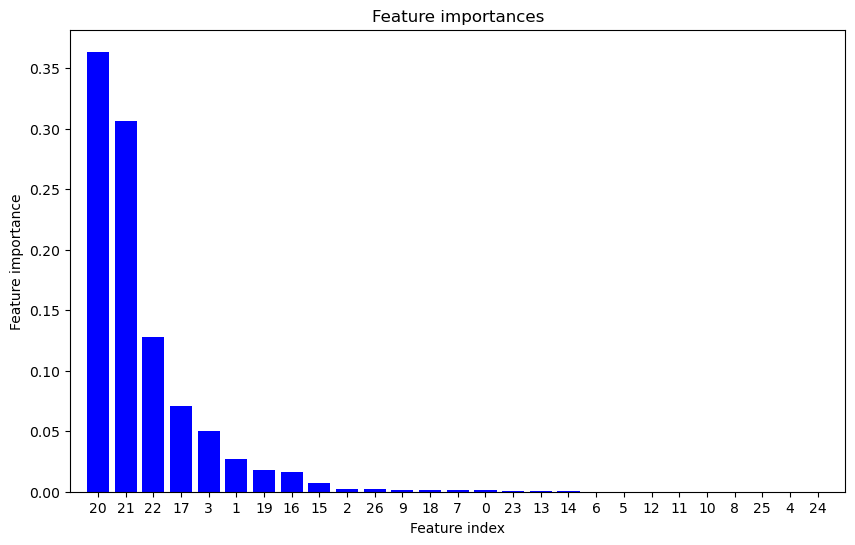

In [48]:
#Get feature importances
importances = best_clf.feature_importances_

variable_names = ['loan_amnt', 'int_rate', 'installment', 'grade' , 'emp_length' , 'home_ownership' , 'annual_inc' , 'dti' , 'delinq_2yrs' , 'inq_last_6mths' , 'open_acc' , 'pub_rec' , 'revol_bal' , 'revol_util' , 'total_acc' , 'total_pymnt' , 'total_pymnt_inv' , 'total_rec_prncp' , 'total_rec_int' , 'total_rec_late_fee' , 'recoveries' , 'collection_recovery_fee' , 'last_pymnt_amnt' , 'application_type' , 'acc_now_delinq' , 'tot_cur_bal' , 'total_rev_hi_lim']

#Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

#Print the feature ranking
print("Feature ranking:")


for f in range(X_train_scaled.shape[1]):
    print("%d. feature %d (%f) - %s" % (f + 1, indices[f], importances[indices[f]], variable_names[indices[f]]))

#Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.xlabel("Feature index")
plt.ylabel("Feature importance")
plt.show()


In [49]:
print("Variable corresponding to index 20:", variable_names[20])
print("Variable corresponding to index 20:", variable_names[21])
print("Variable corresponding to index 20:", variable_names[17])
print("Variable corresponding to index 20:", variable_names[3])
print("Variable corresponding to index 20:", variable_names[1])
print("Variable corresponding to index 20:", variable_names[19])

Variable corresponding to index 20: recoveries
Variable corresponding to index 20: collection_recovery_fee
Variable corresponding to index 20: total_rec_prncp
Variable corresponding to index 20: grade
Variable corresponding to index 20: int_rate
Variable corresponding to index 20: total_rec_late_fee




Neural Network Model

In [50]:


# Standardize the features
#Note we are peroforming scaling the orignal X_train and Y_train and not the already scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network architecture for binary classification
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Using binary cross-entropy as the loss function for binary classification
              metrics=['accuracy'])  # Monitor accuracy during training

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the training and test data
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)






C:\Users\shero\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 6s 983us/step - accuracy: 0.9425 - loss: 0.1705 - val_accuracy: 0.9582 - val_loss: 0.1327
Epoch 2/50
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9616 - loss: 0.1225 - val_accuracy: 0.9600 - val_loss: 0.1251
Epoch 3/50
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 5s 954us/step - accuracy: 0.9631 - loss: 0.1191 - val_accuracy: 0.9610 - val_loss: 0.1229
Epoch 4/50
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 5s 933us/step - accuracy: 0.9632 - loss: 0.1165 - val_accuracy: 0.9605 - val_loss: 0.1235
Epoch 5/50
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 5s 918us/step - accuracy: 0.9637 - loss: 0.1153 - val_accuracy: 0.9615 - val_loss: 0.1209
Epoch 6/50
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 5s 937us/step - accuracy: 0.9631 - loss: 0.1161 - val_accuracy: 0.9620 - val_loss: 0.1212
Epoch 7/50
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 5s 931us/step - accuracy: 0.9637 - loss: 0.1154 - val_accuracy: 0.9613 - val_loss: 0.1202
Epoch 8/50
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 5s 966us/step - accuracy: 0.9639 - l

In [51]:

# Make predictions for both training and test data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate MSE for both training and test data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)



6832/6832 ━━━━━━━━━━━━━━━━━━━━ 4s 611us/step
6835/6835 ━━━━━━━━━━━━━━━━━━━━ 4s 596us/step


In [52]:
print("Train Accuracy:", train_accuracy)
print("Train MSE:", train_mse)
print("Test Accuracy:", test_accuracy)
print("Test MSE:", test_mse)

Train Accuracy: 0.9673702120780945
Train MSE: 0.02748277003053054
Test Accuracy: 0.962897777557373
Test MSE: 0.031605380302150855
